<a href="https://colab.research.google.com/github/tallpress/fastai/blob/master/practice_data_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data visualisation using 'Countries of the World' dataset

### Getting the data

First we will need the dataset, which we can get from kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"tallpress","key":"2e3d87bd84ce425153500f455a6818bb"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json' ~/.kaggle/

In [13]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
new-york-state/nys-environmental-remediation-sites          NYS Environmental Remediation Sites                   5MB  2019-08-12 08:11:48           2415  
new-york-city/new-york-city-current-job-postings            New York City Current Job Postings                    3MB  2019-08-11 22:05:11           6721  
eliasdabbas/search-engine-results-flights-tickets-keywords  Search Engine Results - Flights & Tickets Keywords   22MB  2019-08-01 11:51:13           1775  
google/google-landmarks-dataset                             Google-Landmarks Dataset                            107MB  2019-08-12 12:00:26          11048  
AnalyzeBoston/crimes-in-boston                              Crim

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d fernandol/countries-of-the-world

  0% 0.00/13.4k [00:00<?, ?B/s]
100% 13.4k/13.4k [00:00<00:00, 5.28MB/s]


In [20]:
!ls -la

total 36
drwxr-xr-x 1 root root  4096 Aug 12 20:12  .
drwxr-xr-x 1 root root  4096 Aug 12 19:48  ..
drwxr-xr-x 1 root root  4096 Aug  7 16:05  .config
-rw-r--r-- 1 root root 13695 Aug 12 20:12  countries-of-the-world.zip
-rw-r--r-- 1 root root    65 Aug 12 20:06 'kaggle (1).json'
drwxr-xr-x 1 root root  4096 Aug  2 16:06  sample_data


We now have the zip file which contains the csv

### Getting the data into pandas dataframe

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import zipfile

%matplotlib inline


In [0]:
with zipfile.ZipFile('countries-of-the-world.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')


In [0]:
df = pd.read_csv('countries of the world.csv')

In [35]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


Some of the columns' values are strings using , as the decimal point, we need to reformat this so python can read the values.

In [88]:
cols_not_to_fmt = [
    'Country', 'Population', 'Region', 'Area (sq. mi.)', 'GDP ($ per capita)', 
    'Climate']

df = df.apply(lambda x: x.str.replace(',','.')
              if x.name not in cols_not_to_fmt else x)
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,col_3
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38,48.0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579,124.6
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.6,0.298,13.8
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10,15,75,2,22.46,3.27,NaN,NaN,NaN,290.4
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.6,4.05,19000.0,100.0,497.2,2.22,0,97.78,3,8.71,6.25,NaN,NaN,NaN,152.1


### Basic visualisation

Let us have a look at GDP vs Net migration as an intial "easy" plot

In [0]:
gdp_mig_df = df[['Country', 'Net migration', 'GDP ($ per capita)']]

In [69]:
gdp_mig_df.head()

,Country,Net migration,GDP ($ per capita)
0,Afghanistan,23.06,700.0
1,Albania,-4.93,4500.0
2,Algeria,-0.39,6000.0
3,American Samoa,-20.71,8000.0
4,Andorra,6.6,19000.0


To clean the data we can drop all rows which have NaN values

In [0]:
clean_gdp_mig_df = gdp_mig_df.dropna().sample(50)

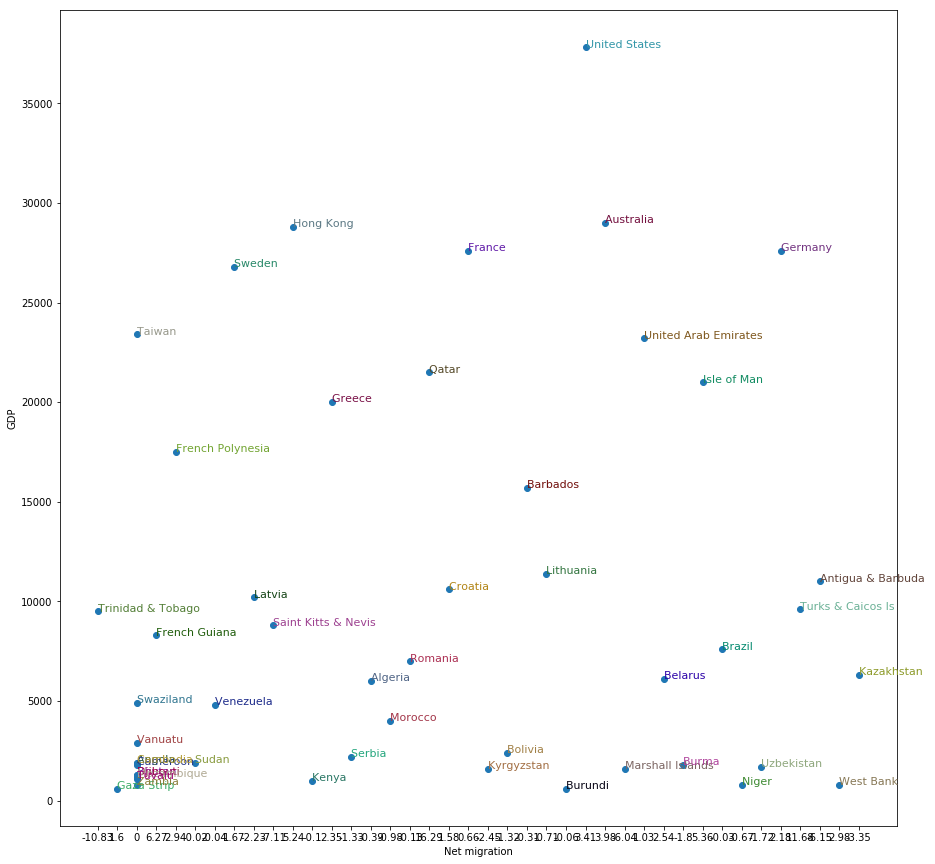

In [71]:
X = clean_gdp_mig_df['Net migration']
Y = clean_gdp_mig_df['GDP ($ per capita)']

plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(clean_gdp_mig_df['Country'], X, Y):
  n = np.random.rand(3)*0.7
  plt.text(x,y,i, color=n, fontsize=11)
plt.xlabel("Net migration")
plt.ylabel("GDP")
plt.show()

Surprisingly, there doesn't seem to be any obvious relationship between the these variables.

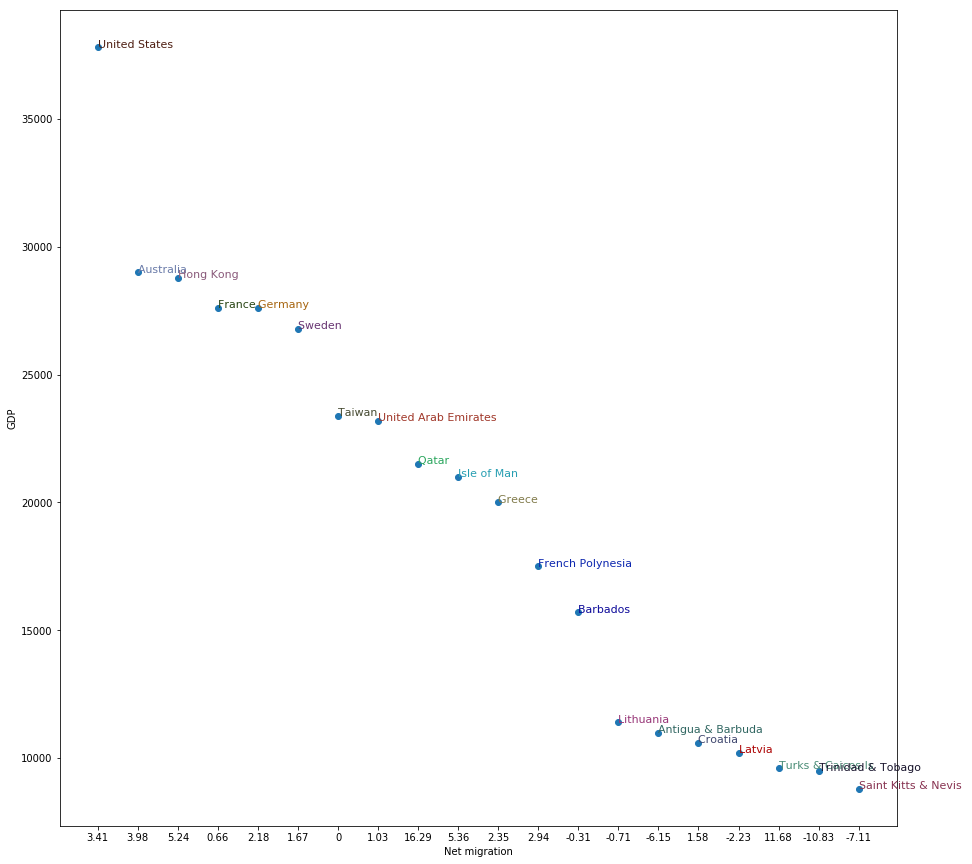

In [79]:
richest = clean_gdp_mig_df.nlargest(20, 'GDP ($ per capita)')
X = richest['Net migration']
Y = richest['GDP ($ per capita)']

plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(richest['Country'], X, Y):
  n = np.random.rand(3)*0.7
  plt.text(x,y,i, color=n, fontsize=11)
plt.xlabel("Net migration")
plt.ylabel("GDP")
plt.show()